In [88]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import scipy as sc
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib inline

## KMeans Clustering from scratch

In [72]:
# fetch dataset from UCIrivine repo
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = np.asarray(iris.data.features, dtype=np.float32)
y = np.asarray(pd.factorize(iris.data.targets['class'])[0], dtype=np.int16)



### The EM Algoritm for KMeans

In [78]:
def k_means(X, k=10, max_iterations=50, threshold=0.0001):
    mu_arr = X[np.random.choice(len(X), k, replace=False)]  # Random cluster centers
    obj = np.inf                                          # Objective function value (we want to minimize this)

    for i in range(max_iterations):
        pi = np.zeros((len(X), k), dtype=np.int16)          # Cluster membership
                                                            # E-step
        distances = sc.spatial.distance.cdist(X, mu_arr, metric='euclidean')    # Euclidean distances
        c_labels = np.argmin(distances, axis=1, keepdims=True)   # Assign cluster label of the nearest center
        # print(f'labels: {c_labels.shape} pi: {pi.shape}')
        np.put_along_axis(pi, c_labels, 1, axis=1)          # Set new labels

        for j in range(k):                                  # M-step
            elements_of_j = np.where(c_labels == j)
            mu_arr[j] = np.mean(X[elements_of_j], axis=0)

        # distances = sc.spatial.distance.cdist(X, mu_arr, metric='euclidean')
        # print(pi)
        new_obj = np.sum(pi * distances)
        print(new_obj)

        if float(abs(obj - new_obj)) < (obj * threshold):   # check termination criterion
            break
        obj = new_obj

    return obj, pi, mu_arr

In [87]:
_, pi, mus = k_means(X, k=3, max_iterations=50)

156.30040469382536
692.5109705841264
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


/home/shonenash/data/workspace/ml-algos-from-scratch/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shonenash/data/workspace/ml-algos-from-scratch/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


In [83]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)


Text(0.5, 1.0, 'Iris: PCA')

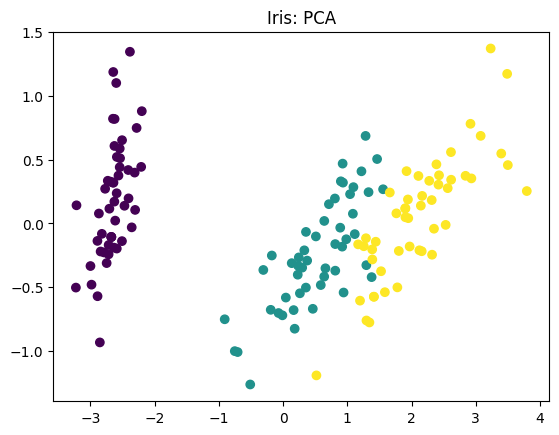

In [86]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("Iris: PCA")